In [1]:
import xmltodict
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def En(n, m, j):
    Energy = [] 
    path = "C:/Users/Mindelly/Documents/GitHub/diagrams2/w3/"
    for i in range(n, m):
        file_name = str(i) +"-" +str(j)+ ".task1.out.xml"
        with open(path + file_name) as xml_file:
            data_dict = xmltodict.parse(xml_file.read())
        Energy.append(float(data_dict['SIMULATION']['EIGENSTATES']['EIGENSTATE']['SCALAR_AVERAGE'][0]['MEAN']))
    return Energy

In [5]:
#E(N, 0) : (2, 0), (3, 0), ... (118, 0)
e1 = En(2, 118, 0)

#E(N+1, 1) : (3, 1), (4, 1), ... (119, 1)
e2 = En(3, 119, 1)

#E(N-1, 1) : (1, 1), (3, 1), ... (117, 1)
e3 = En(1, 117, 1)

In [23]:
h = []
mu = []
for x in range(len(e1)):
    h.append((e3[x] - e1[x]) / -2)
    mu.append((e2[x] - e1[x]) / 2)
    

e10 = En(1, 2, 0)[0]
e11 = En(1, 2, 1)[0]

h2 = np.arange(h[0], 2.7, 0.1)
def mu2(h):
    return - h + e10

h3 = np.arange(5.3, 9, 0.2)
def mu3(h):
    return -h - e10


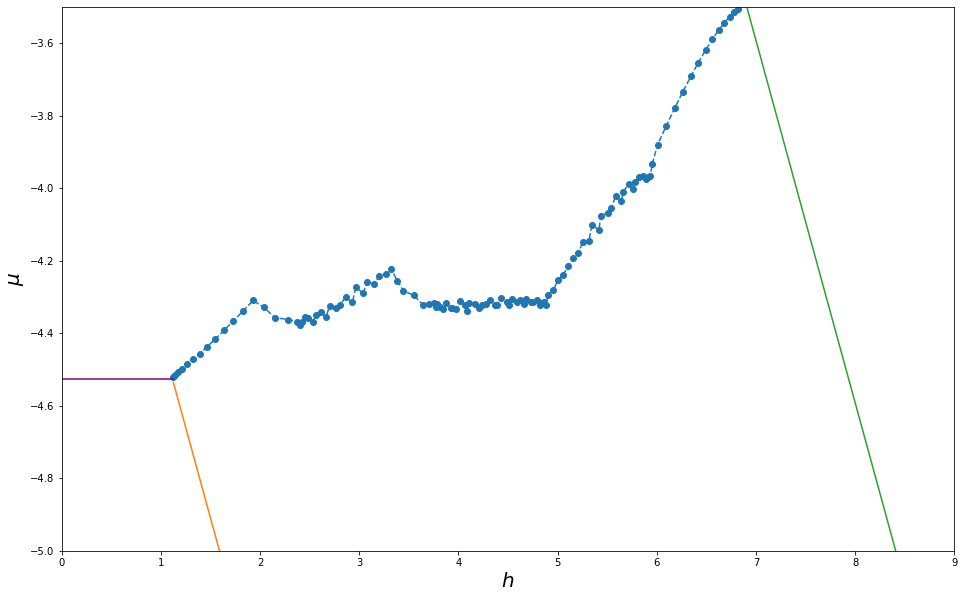

In [29]:
plt.figure(figsize=(16, 10))
xscale = 9

plt.plot(h, mu, 'o--')
plt.axhline(y=(e11/2), color='purple', xmax=(h[0]/xscale))
plt.plot(h2, mu2(h2), '-')
plt.plot(h3, mu3(h3), '-')

plt.xlabel('$h$', size=20)
plt.ylabel('$\mu$', size=20)
plt.axis([0, xscale, -5, -3.5])
plt.show()